Байесовскую ридж-регрессию (Bayesian Ridge Regression)
Модель Lasso
Модель Персептрона (Perceptron)
Классифицируйте данные  при помощи метода опорных векторов (SVM)
Кластеризуйте данные с использование метода k- средних

In [3]:
from sklearn.datasets import load_iris 
import matplotlib.pyplot as plt

iris = load_iris()

x, y = load_iris(return_X_y=True)

#print(load_iris()['DESCR'])
print(iris.feature_names)
print(x[:4])
print(iris.target_names)
print(y[:4])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0]


**Bayesian Ridge Regression**

In [ ]:
from sklearn import linear_model
clf = linear_model.BayesianRidge(n_iter = 1000)
clf.fit(x,y)
print("Коэффициенты")
print(clf.coef_)
print("Качество модели")
print(clf.score(x,y))

In [ ]:
pred = clf.predict(x)
plt.scatter(y, pred)

можно увидеть, что предсказания с некоторым разбросом соответсвуют y

**Модель Lasso**

In [ ]:
reg = linear_model.Lasso(alpha=0.0001)
reg.fit(x,y)
print("Коэффициенты")
print(reg.coef_)
print("Качество модели")
print(reg.score(x,y))

In [ ]:
pred2 = reg.predict(x)
plt.scatter(y, pred2)

**Модель Персептрона (Perceptron)**

In [ ]:
per = linear_model.Perceptron(fit_intercept=False, eta0=0.01)
per.fit(x,y)

print("Качество модели")
print(per.score(x,y))

In [ ]:
pred3 = per.predict(x)
plt.hist(y)
plt.hist(pred3, alpha = 0.6)

**Классифицируйте данные  при помощи метода опорных векторов (SVM)**

Работа метода опорных векторов заключается в рисовании линии между разными кластерами точек, которые нужно сгруппировать в классы. С одной стороны линии будут точки, принадлежащие одному классу, с другой стороны — к другому классу.

Классификатор будет пытаться увеличить расстояние между рисуемыми линиями и точками на разных сторонах, чтобы увеличить свою «уверенность» определения класса. Когда все точки построены, сторона, на которую они падают — это класс, которому эти точки принадлежат.

In [4]:
from sklearn import svm
import matplotlib.lines as mlines
from sklearn.metrics import recall_score

cl = svm.SVC()
cl.fit(x, y)
pred4 = cl.predict(x)
print(recall_score(y, pred4, average=None))

[1.   0.96 0.96]


(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

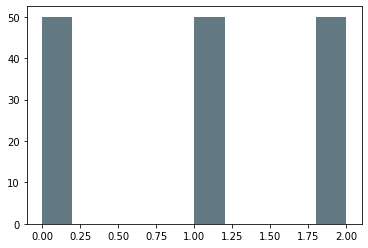

In [5]:
plt.hist(y)
plt.hist(pred4, alpha = 0.3)

Полностью совпадают!

**Кластеризуйте данные с использование метода k- средних**

(array([38.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 62.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

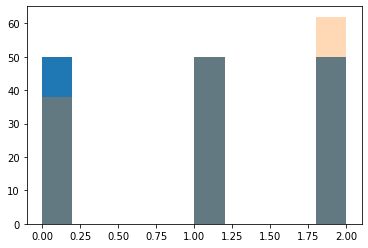

In [6]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 3, n_init = 10, copy_x = True)
k_means.fit(x,y)
pred5 = k_means.predict(x)

plt.hist(y)
plt.hist(pred5, alpha = 0.3)